<a href="https://colab.research.google.com/github/Kanaisabhi/Data_Analysis_Projects/blob/main/Netflix_movies_dataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install numpy pandas matplotlib seaborn

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("mymoviedb.csv",lineterminator='\n')
df.head()


,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


"Release_Date" is object(Dtype) but we have to change it into Date-time format.

In [ ]:
df['Genre'].head()

,Genre
0,"Action, Adventure, Science Fiction"
1,"Crime, Mystery, Thriller"
2,Thriller
3,"Animation, Comedy, Family, Fantasy"
4,"Action, Adventure, Thriller, War"


Whitespace, might be needed to remove it in further process.

In [ ]:
df.duplicated().value_counts()

,count
False,9827


We can use ".sum()" too but i was just playing with it

In [ ]:
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


In [ ]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'])

In [ ]:
df['Release_Date'].dtypes

dtype('<M8[ns]')

In [ ]:
df['Release_Date'] = df['Release_Date'].dt.year
df['Release_Date'].dtypes

dtype('int32')

In [ ]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


Changed the Release Date format.

In [ ]:
cols = ['Overview','Original_Language','Poster_Url']


Unwanted Columns to drop !!

In [ ]:
df.drop(cols , axis = 1 , inplace=True)


In [ ]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,Thriller
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"


In [ ]:
"""def categorizing_Vote(df, col , labels):
  edges =  [df[col].describe()['min'],
           df[col].describe()['25%'],
           df[col].describe()['50%'],
           df[col].describe()['75%'],
           df[col].describe()['max']]

  df[col] = pd.cut(df[col],edges, labels=labels , duplicates='Drop')
  return df

  #Clean code -
  def categorize_vote_cut(df, col, labels):
    desc = df[col].describe()
    edges = [desc["min"], desc["25%"], desc["50%"], desc["75%"], desc["max"]]
    df[col] = pd.cut(df[col], bins=edges, labels=labels, duplicates="drop")
    return df
"""
def categorizing_Vote(df, col , labels):
  df[col] = pd.qcut(df[col],q=len(labels),labels=labels)
  return df

Categorizing Vote_Average column for better understanding

In [ ]:
labels = ['not_popular','low_popular','medium_popular','high_popular']
categorizing_Vote(df,'Vote_Average',labels)
df['Vote_Average'].unique()

['high_popular', 'low_popular', 'medium_popular', 'not_popular']
Categories (4, object): ['not_popular' < 'low_popular' < 'medium_popular' < 'high_popular']

In [ ]:
df.head()
df['Vote_Average'].value_counts()

,count
Vote_Average,
not_popular,2567
high_popular,2450
medium_popular,2412
low_popular,2398


In [ ]:
df.dropna(inplace=True)
df.isna().sum()

,0
Release_Date,0
Title,0
Popularity,0
Vote_Count,0
Vote_Average,0
Genre,0


Now let's split "Genre" into list and then exploring to only have 1 genre per row

In [ ]:
df['Genre'] = df['Genre'].str.split(', ')
df = df.explode('Genre').reset_index(drop=True)
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,high_popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,high_popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,high_popular,Science Fiction
3,2022,The Batman,3827.658,1151,high_popular,Crime
4,2022,The Batman,3827.658,1151,high_popular,Mystery


In [ ]:
df['Genre']=df['Genre'].astype("category")
#casting column into category

In [ ]:
df.info()
df.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25793 entries, 0 to 25792
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25793 non-null  int32   
 1   Title         25793 non-null  object  
 2   Popularity    25793 non-null  float64 
 3   Vote_Count    25793 non-null  int64   
 4   Vote_Average  25793 non-null  category
 5   Genre         25793 non-null  category
dtypes: category(2), float64(1), int32(1), int64(1), object(1)
memory usage: 756.7+ KB


,0
Release_Date,102
Title,9513
Popularity,8160
Vote_Count,3266
Vote_Average,4
Genre,19


# Data Visualization

In [ ]:
sns.set_style('whitegrid')

# Most Frequent Genre of Movies released on Netflix

In [ ]:
df['Genre'].describe()

,Genre
count,25793
unique,19
top,Drama
freq,3744


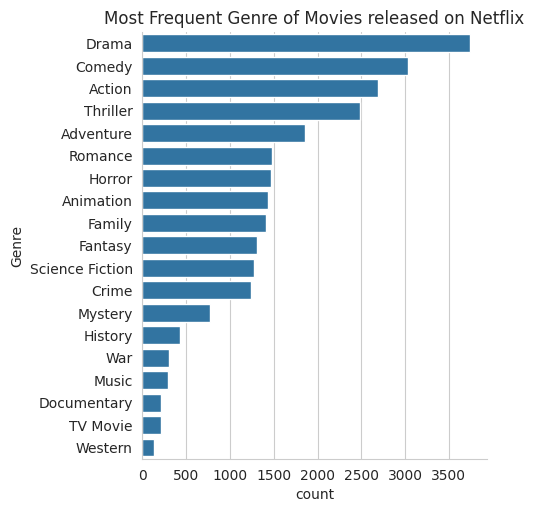

In [ ]:
sns.catplot(y = "Genre" , kind = "count" , data = df , order = df['Genre'].value_counts().index)
plt.title("Most Frequent Genre of Movies released on Netflix")
plt.show()

# Highest Vote in Vote avg coloumn

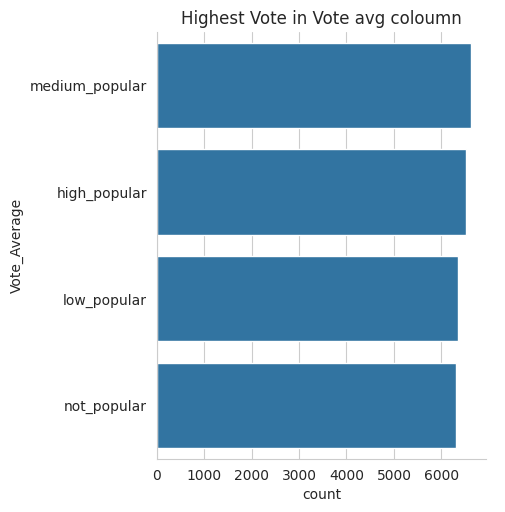

In [ ]:
sns.catplot(y = "Vote_Average" , kind = "count" , data = df , order = df['Vote_Average'].value_counts().index)
plt.title("Highest Vote in Vote avg coloumn")
plt.show()

# Movie got the highest popularity ? what it's genre ?

In [ ]:
df[df['Popularity'] == df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,high_popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,high_popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,high_popular,Science Fiction


# Movie got the lowest popularity ? what it's genre ?

In [ ]:
df[df['Popularity'] == df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25787,2021,The United States vs. Billie Holiday,13.354,152,medium_popular,Music
25788,2021,The United States vs. Billie Holiday,13.354,152,medium_popular,Drama
25789,2021,The United States vs. Billie Holiday,13.354,152,medium_popular,History
25790,1984,Threads,13.354,186,high_popular,War
25791,1984,Threads,13.354,186,high_popular,Drama
25792,1984,Threads,13.354,186,high_popular,Science Fiction


# Which Year has the most filmed movies ?

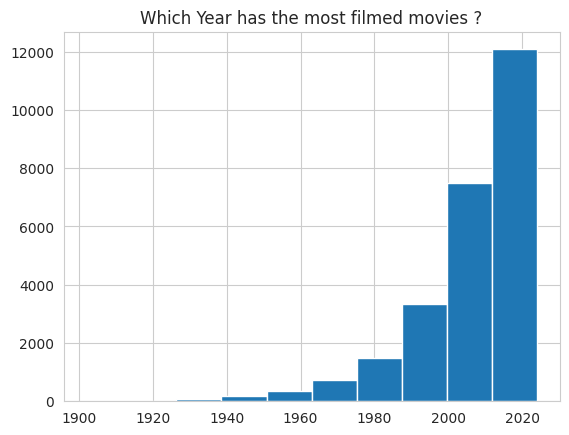

In [ ]:
df['Release_Date'].hist()
plt.title("Which Year has the most filmed movies ?")
plt.show()

# Q1.What is the most Frequent genre in the dataset?

Drama genre is the most frequent genre in our dataset and has appeared more than 14% of the times among other 19 genre.

# Q2.What genre has highest Votes ?

We have 25.5% of our dataset with popular vote (6520 row) : Drama again gets the highest popularity among fans by being having more tha 18.5% of movies popularities.

# Q3.What movies got the highest popularity ? and what it's genre ?

Spider man : No way Home has the highest popularity rate in our data set and it has genre of Action, Adventure,and Science-Fiction


# Q4.What movies got the Lowest popularity ? and what it's genre ?

The United States, Threads has the lowest popularity rate in our data set and it has genre of Music, Drama , War , Sci-fi and history

#Q5.Which year has the most fillmed movie ?

Year 2020 has the highest filmming rate in our dataset